In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import os
from PIL import Image

In [3]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

NameError: name 'img_height' is not defined

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import numpy as np

# Specify the path to your dataset directory
dataset_directory = "C:/Users/weesh/dsa4262-project/data/archive/train"

# Define the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Iterate through each class directory in your dataset
for class_folder in os.listdir(dataset_directory):
    class_path = os.path.join(dataset_directory, class_folder)
    
    # Count the number of samples in this class
    num_samples = len(os.listdir(class_path))
    
    # Calculate the number of augmentations needed to balance the class
    augmentations_needed = 1500 - num_samples  # max_samples is the desired number of samples per class
    
    if augmentations_needed > 0:
        # Use data augmentation to generate additional samples for this class
        class_images = [os.path.join(class_path, image_file) for image_file in os.listdir(class_path)]
        
        for i in range(augmentations_needed):
            # Randomly select an image from the class
            img_path = random.choice(class_images)
            
            # Load and convert the image to a NumPy array
            img = Image.open(img_path)
            img = np.array(img)
            
            # Apply data augmentation
            augmented_img = datagen.random_transform(img)
            
            # Convert the NumPy array back to an image
            augmented_img = Image.fromarray(augmented_img)
            
            # Save the augmented image to the class folder
            augmented_img.save(os.path.join(class_path, f"augmented_{i}.jpg"))

In [3]:
# Specify the path to your image dataset directory
local_data_dir = "C:/Users/weesh/dsa4262-project/data/archive/train"
local_data_dir1 = "C:/Users/weesh/dsa4262-project/data/archive/test"
import pathlib

# Use pathlib to list the files in the directory
data_dir = pathlib.Path(local_data_dir)
test_dir = pathlib.Path(local_data_dir1)

In [26]:
batch_size = 64
img_height = 180
img_width = 180

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir, 
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34500 files belonging to 23 classes.
Using 27600 files for training.


In [28]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir, 
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34500 files belonging to 23 classes.
Using 6900 files for validation.


In [29]:
class_names = train_ds.class_names
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [36]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
normalization_layer = layers.Rescaling(1./255)

In [32]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.85980374


In [37]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [38]:
from tensorflow.keras.regularizers import l2
num_classes = len(class_names)
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding = 'same', activation='relu',kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(num_classes)
])

In [18]:
num_classes = len(class_names)
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
432/432 [==============================] - 314s 724ms/step - loss: 3.2792 - accuracy: 0.0876 - val_loss: 3.0990 - val_accuracy: 0.1084
Epoch 2/10
432/432 [==============================] - 313s 723ms/step - loss: 3.1205 - accuracy: 0.1123 - val_loss: 3.0884 - val_accuracy: 0.1317
Epoch 3/10
432/432 [==============================] - 313s 724ms/step - loss: 3.0744 - accuracy: 0.1311 - val_loss: 3.0849 - val_accuracy: 0.1484
Epoch 4/10
432/432 [==============================] - 316s 732ms/step - loss: 3.0323 - accuracy: 0.1484 - val_loss: 3.0037 - val_accuracy: 0.1523
Epoch 5/10
432/432 [==============================] - 317s 733ms/step - loss: 2.9989 - accuracy: 0.1565 - val_loss: 2.9597 - val_accuracy: 0.1696
Epoch 6/10
432/432 [==============================] - 311s 721ms/step - loss: 2.9736 - accuracy: 0.1646 - val_loss: 2.9454 - val_accuracy: 0.1751
Epoch 7/10
432/432 [==============================] - 314s 726ms/step - loss: 2.9589 - accuracy: 0.1683 - val_loss: 2.9501 -

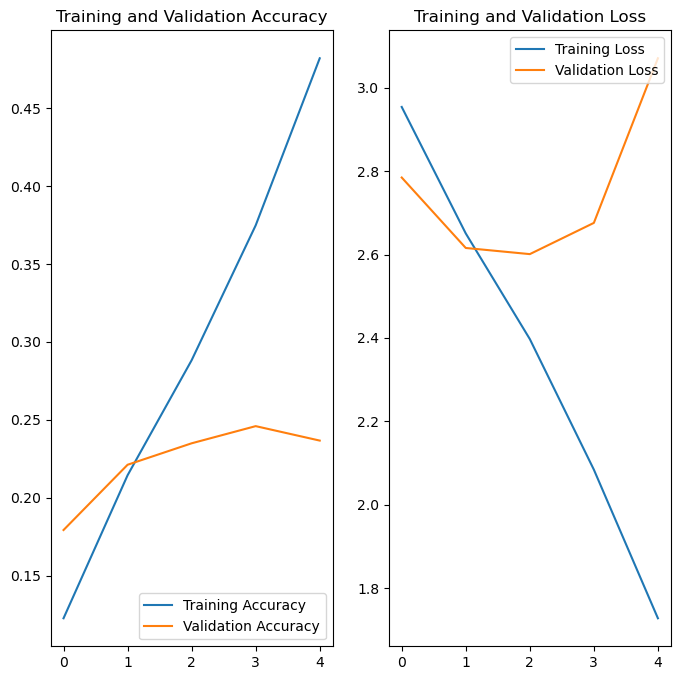

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()